<a href="https://colab.research.google.com/github/AnnyshkaF/High-Performance-Lab/blob/main/task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Julia set

import matplotlib.pyplot as plt
import numpy as np
from random import random
import itertools

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in square
  


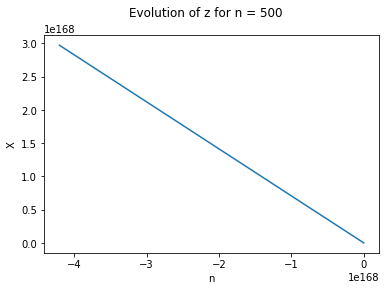

In [48]:
# Implement the map, plot the evolution of z (Re(z), Im(z))
def z_function(z, c):
    return z**2 + c

# Fix a value of C (can be 0)
c = 0
# Play around with values of z0, see the change of evolution
z = np.random.random(1) + np.random.random(1) * 1j

n = 500
Z = []; Zreal = []; Zimag = []
for i in range(n):
  z = z_function(z,c)
  Z.append(z)
  Zreal.append(z.real)
  Zimag.append(z.imag)

# Plot the evolution of Z
plt.suptitle('Evolution of z for n = {}'.format(n))
plt.xlabel('n')
plt.ylabel('X')
plt.plot(Zreal,Zimag)


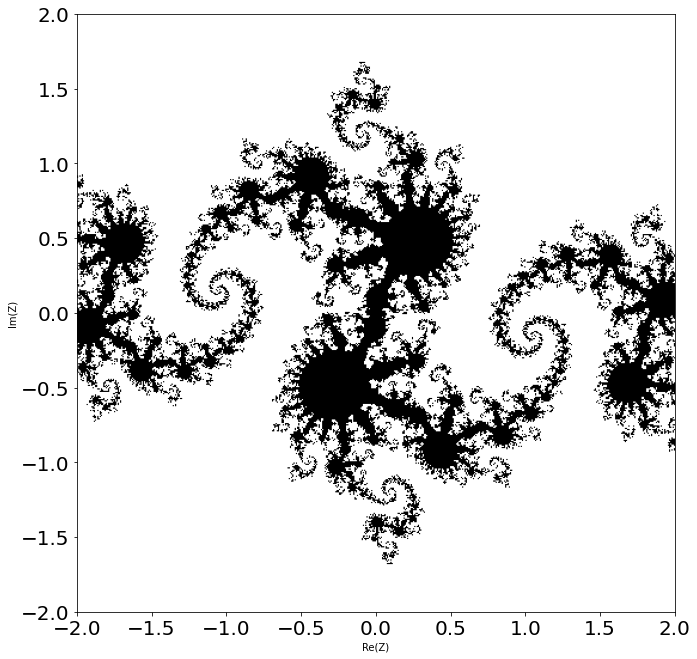

In [62]:

def julia_binary(min_value=-2, max_value=2, density=100, 
                 c= -0.8 + 0.156j, max_iter=100, limit=2):
    xvalues = np.linspace(max_value, min_value, density)
    yvalues = np.linspace(min_value, max_value, density)
    values_map = list(itertools.product(xvalues, yvalues)) 
    values_map = np.array(values_map).reshape(density, density, 2)
    Z = (values_map[...,1] + 1j * values_map[...,0]) 
    M = np.full((density, density), True, dtype=bool)
    
    for i in range(max_iter):
        Z[M] = Z[M] * Z[M] + c
        M[np.abs(Z) > limit] = False
        
    return ~M

    
def julia(min_value=-2, max_value=2, density=100, c= -0.8 + 0.156j , max_iter=100, 
          limit=2, norm=False, revert=True):
    xvalues = np.linspace(max_value, min_value, density)
    yvalues = np.linspace(min_value, max_value, density)
    
    values_map = list(itertools.product(xvalues, yvalues)) # suboptimal solution
    values_map = np.array(values_map).reshape(density, density, 2)
    Z = (values_map[...,1] + 1j * values_map[...,0]) # array of complex values

    M = np.full((density, density), True, dtype=bool)
    I = np.zeros((density, density), dtype=int)
    for i in range(max_iter):
        Z[M] = Z[M] * Z[M] + c
        I[M] += 1
        M[np.abs(Z) > limit] = False
    return 255 - I

def plot_fractal(values_map, c=None):
    plt.figure(figsize=(14, 11))
    plt.imshow(values_map, cmap=plt.cm.gray, extent=(-2, 2, -2, 2))
    plt.tick_params(axis='both', labelsize=20)
    plt.xlabel('Re(Z)')
    plt.ylabel('Im(Z)')


jb = julia_binary(min_value=-1, max_value=1, density=500, max_iter=100, c = -0.8 + 0.156j)
plot_fractal(jb)
